# Projeto 1

---
<h2> Parte A: 
    
 - Gerar 200 padrões a partir de cada um dos 3 autômatos de 2 nós nas Figuras 6(a-c). Visualizar  alguns  destes  padrões utilizando-se gráficos do tipo stem, square wave e barplot.
 - Utilizar  tamanhos  dos  padrões  $M  =  500,  750,  ...,  2000$. Obter a média e o desvio padrão da  frequência  relativa  de  símbolos  1s  relativas  ao  conjunto  de  sinais  gerados  para  cada autômato  de  tamanho  $M$. Desenhar  todas  as  densidades  de  probabilidades  normais especificadas  por  estas  médias  e  desvios.
 - **Objetivo:** reproduzir  os  resultados nas Figuras 13 e 14.<h2>

In [1]:
from P1aux import *

#Função usada para gerar os automatos a partir da matriz de probabilidades, retorna proximo numero da sequencia
def NextStep(last, matriz):
    i = 0
    p = matriz[last][0]
    r = np.random.random(1)[0]
    
    while r>p:
        i = i+1
        p =p+ matriz[last][i]
    return i

#função que gera um automato de tamanho M 
def new_automato(matriz, M = 200):
    automato = [0]
    while len(automato) < M:
        automato.append(NextStep(automato[-1], matriz))
    return automato


#Matrizes de probabilidades
A = np.array([[0.9, 0.1],[0.9, 0.1]])
B = np.array([[0.2, 0.8], [0.2, 0.8]])
C = np.array([[0.5, 0.5],[0.5, 0.5]])


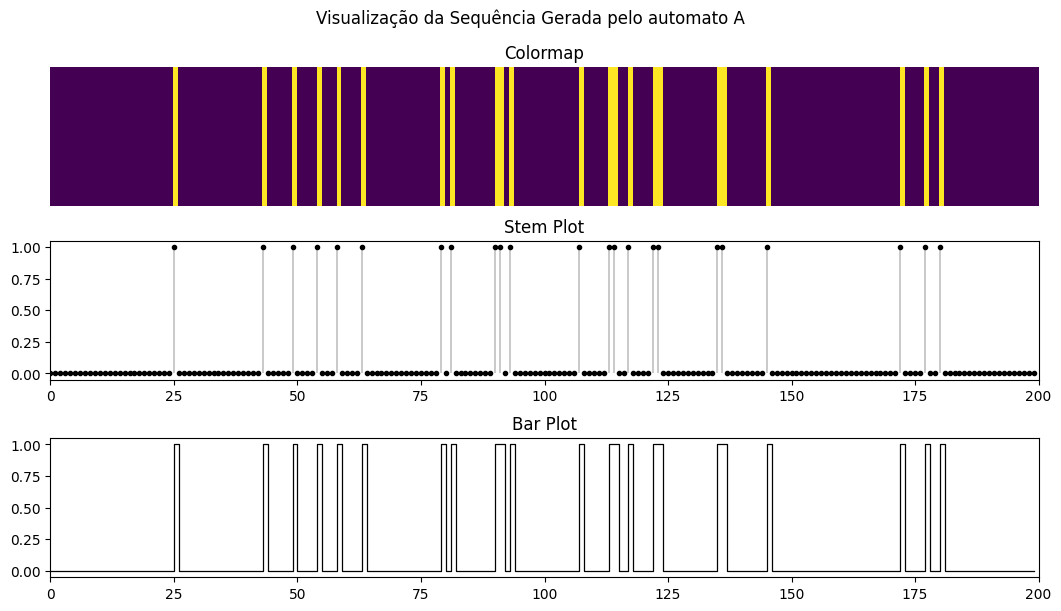

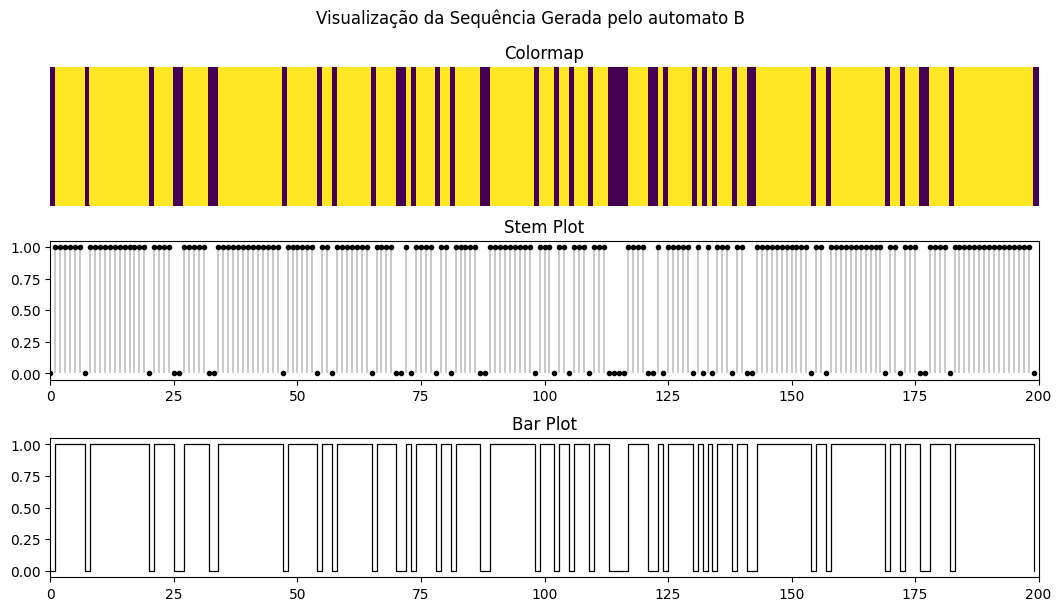

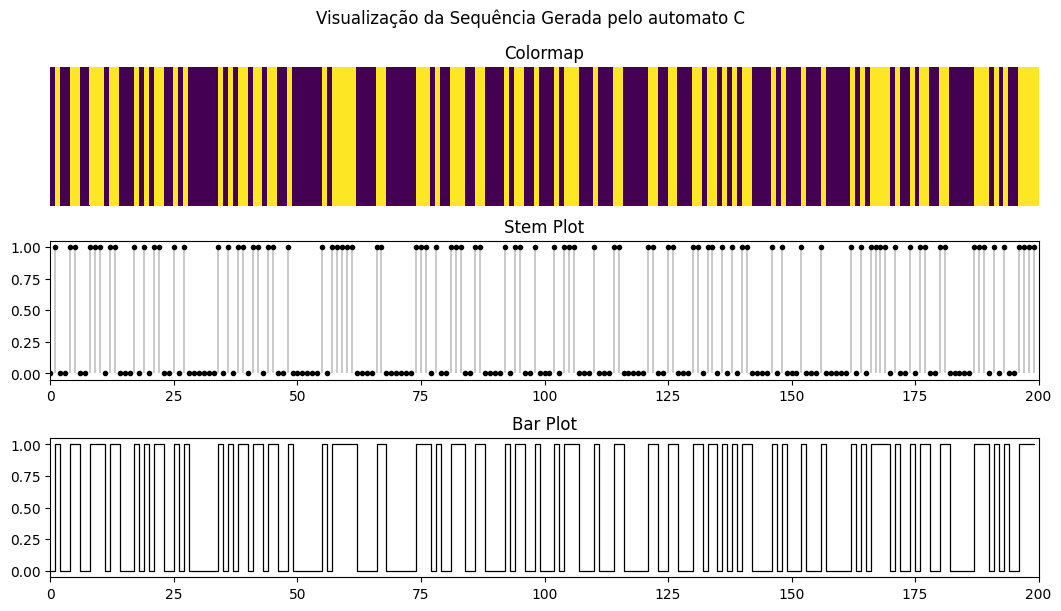

In [2]:
#Gerando 200 padrões dos automatos A, B e C
automato_a = new_automato(A,200)
automato_b = new_automato(B,200)
automato_c = new_automato(C,200)

plot(automato_a, "A")
plot(automato_b, "B")
plot(automato_c, "C")

         Média    Desvio
500   0.099640  0.014494
750   0.101053  0.010534
1000  0.099210  0.010103
1250  0.098408  0.008746
1500  0.099053  0.007741
1750  0.099389  0.006682


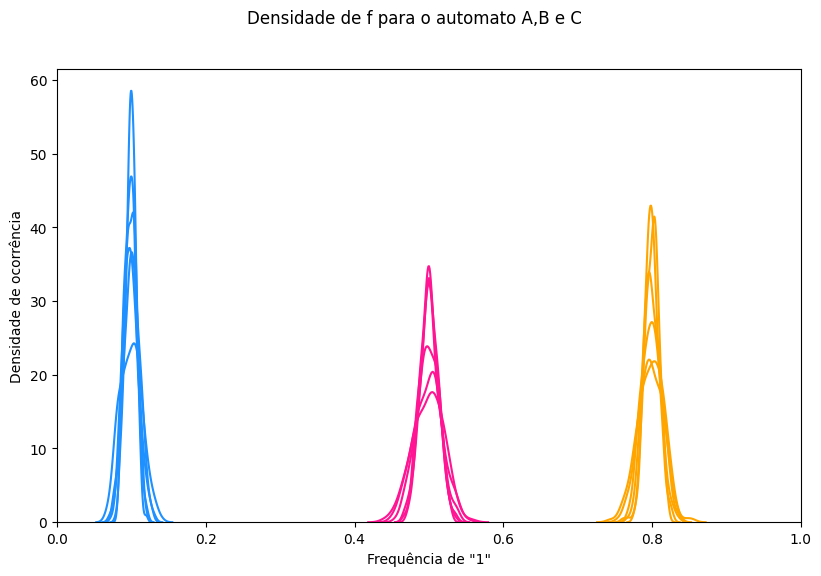

In [10]:
#Probabilidades normais
plt.figure(figsize=(9.6,6), dpi = 100)
means, std, m = [],[],[]
#Loop para variar o tamanho M entre [500,750,1000,...,2000]
for M in range(500,2000,250):
    #loop para gerar os 200 automatos
    f_a, f_b, f_c = [], [], []
    for N in range(200):
        #loop para criar os automatos com tamanho M
        automato_a = new_automato(A, M)
        automato_b = new_automato(B, M)
        automato_c = new_automato(C, M)
        f_a.append(freq(automato_a,1))
        f_b.append(freq(automato_b,1))
        f_c.append(freq(automato_c,1))
    plot_density([f_a, f_b, f_c], "A,B e C ")
    
    #Calculo dos momentos 
    means.append(np.array(f_a).mean()) 
    std.append(np.array(f_a).std())
    m.append(M)
    
data = {"Média":means, "Desvio": std}
print(pd.DataFrame(data, index = m))

plt.show()

<h2> Parte B:
 - Gerar e visualizar padrões produzidos pelos autômatos nas Figuras 6(d) e (e)<h2>

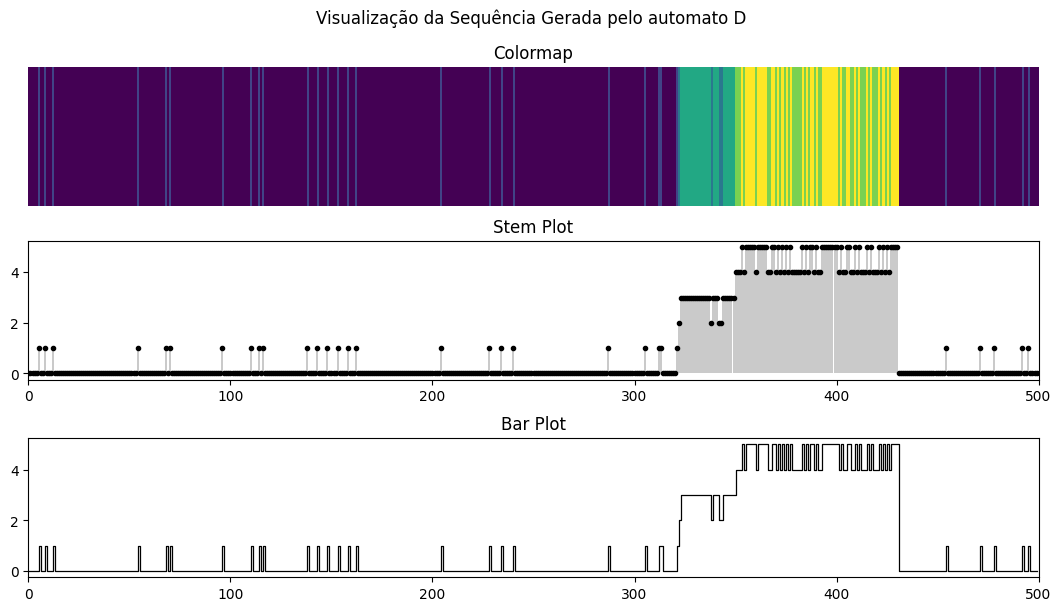

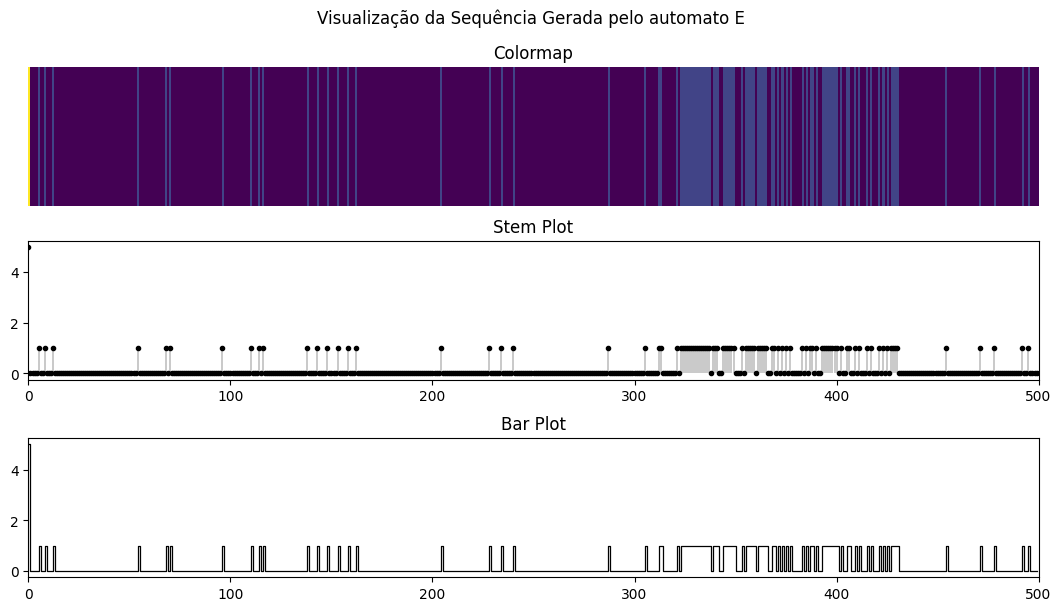

In [4]:
#Matrizes de probabilidades
D = np.array([[0.9,0.1,0,0,0,0],[0.882,0.098,0.02,0,0,0],[0,0,0.2,0.8,0,0],[0,0,0.194,0.776,0.03,0],[0,0,0,0,0.5,0.5],[0.01,0,0,0,0.495,0.495]])
E = D
aux = {0:0, 1:1, 2:0, 3:1, 4:0, 5:1} #Usado para transformar o output do automato E em 0 e 1.

#Inicializando a sequencia
automato_d, automato_e = [0],[5]

#Gerando os automatos com tamanho 500
while len(automato_d) < 500:
    automato_d.append(NextStep(automato_d[-1], D))
    automato_e.append(aux[automato_d[-1]])

#Plot

plot(automato_d, "D")
plot(automato_e, "E")


# Projeto 2

---
<h2> Implementar 4 dos seguintes conjuntos de medidas e testar sobre sinais gerados por autômatos probabilíssimos como os já vistos em aula, incluindo o autômato da Figura 2 do CDT-23:

 - Média, desvio padrão, entropia e evenness do número de bursts, e respectivos tamanhos nos split signals;
 - Média, desvio padrão, entropia e evenness do número de distâncias intersímbolos e respectivos valores nos split signals;
 - Média e desvio padrão das magnitudes do espectro de potência da transformada de Fourier discreta dos split signals (pode usar rotina Para FFT);
 - Média e desvio do grau e coeficiente de aglomeração de grafos dos sinais, obtidos pelo método de visibilidade, que deve ser implementado;
 - Coeficiente alpha do DFA da integral do sinal.<h2>

In [7]:
from P2aux import *

#Automatos usados
A = np.array([[0.9, 0.1],[0.9, 0.1]])
B = np.array([[0.2, 0.8], [0.2, 0.8]])
C = np.array([[0.5, 0.5],[0.5, 0.5]])
D = np.array([[0.9,0.1,0,0,0,0],[0.882,0.098,0.02,0,0,0],[0,0,0.2,0.8,0,0],[0,0,0.194,0.776,0.03,0],[0,0,0,0,0.5,0.5],[0.01,0,0,0,0.495,0.495]])
E = np.array([[0.5,0.5,0,0],[0,0.1,0.9,0],[0,0,0.6,0.4],[0.7,0,0,0.3]]) 


automato_a = New_automato(A,200)
automato_b = New_automato(B,200)
automato_c = New_automato(C,200)
automato_d = New_automato(D,200)
automato_e = New_automato(E,200)

<h2> Média, desvio padrão, entropia e evenness do número de bursts, e respectivos tamanhos nos split signals<h2>

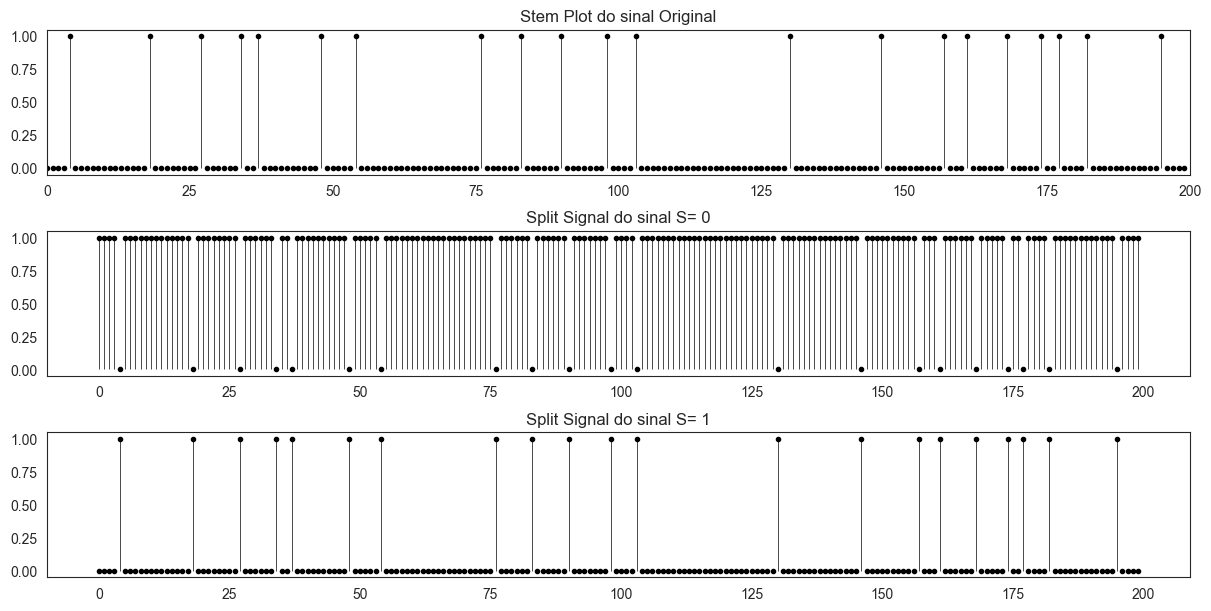

      Média    Desvio  Entropia    Eveness
0  8.333333  6.050056  3.499228  11.307652
1  1.000000  0.000000  0.000000   1.000000


In [7]:
splits_a = Splits_all(automato_a)

means, std, entropy, eveness = [], [], [], []

for split_signal in splits_a:
    means.append(ScanBursts(split_signal).mean())
    std.append(ScanBursts(split_signal).std())
    entropy.append(Entropy(Relative_freq(ScanBursts(split_signal))))
    eveness.append(Evenness(Relative_freq(ScanBursts(split_signal))))
data = {"Média":means, "Desvio": std, "Entropia": entropy, "Eveness":eveness}
print(pd.DataFrame(data))

<h2> Média, desvio padrão, entropia e evenness do número de distâncias intersímbolos e respectivos valores nos split signals<h2>

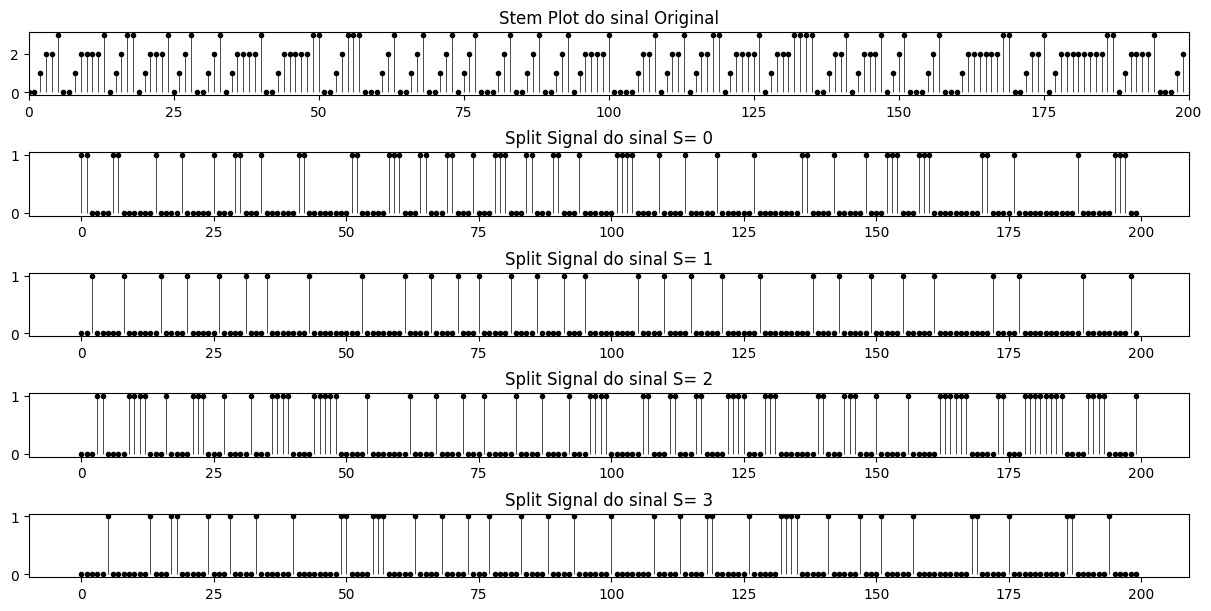

      Média    Desvio  Entropia   Eveness
0  4.766667  2.027861  2.401118  5.282125
1  5.419355  2.225573  2.812889  7.026901
2  4.064516  1.134090  1.930048  3.810678
3  5.166667  1.771691  2.489246  5.614846


In [10]:
splits_e = Splits_all(automato_e)


means, std, entropy, eveness = [], [], [], []
for split_signal in splits_e:
    means.append(Intersymbol(split_signal).mean())
    std.append(Intersymbol(split_signal).std())
    entropy.append(Entropy(Relative_freq(Intersymbol(split_signal))))
    eveness.append(Evenness(Relative_freq(Intersymbol(split_signal))))
data = {"Média":means, "Desvio": std, "Entropia": entropy, "Eveness":eveness}
print(pd.DataFrame(data))

<h2> Média e desvio padrão das magnitudes do espectro de potência da transformada de Fourier discreta dos split signals<h2>

   Média    Desvio  Entropia   Eveness
0  0.275  0.446514  0.848548  1.800688
1  0.155  0.361905  0.622213  1.539234
2  0.370  0.482804  0.950672  1.932773
3  0.200  0.400000  0.721928  1.649385



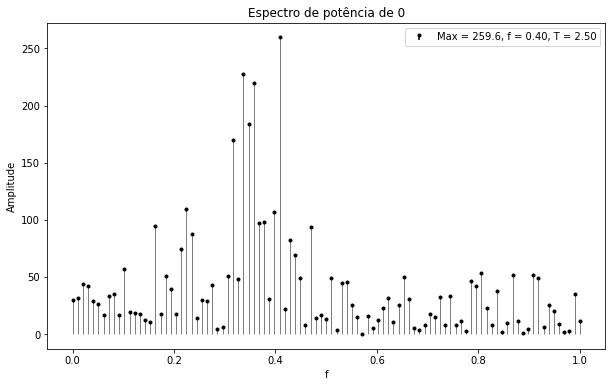

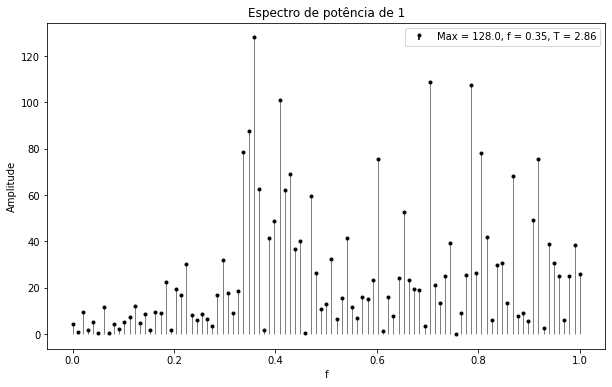

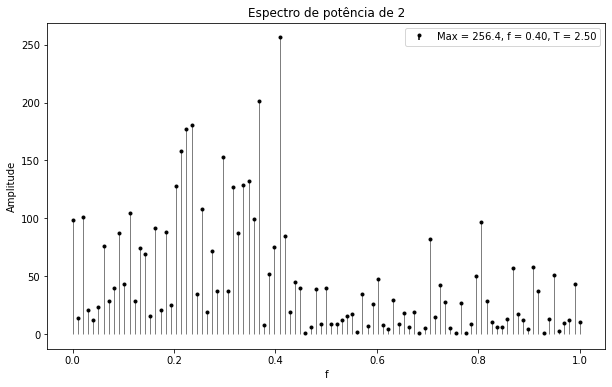

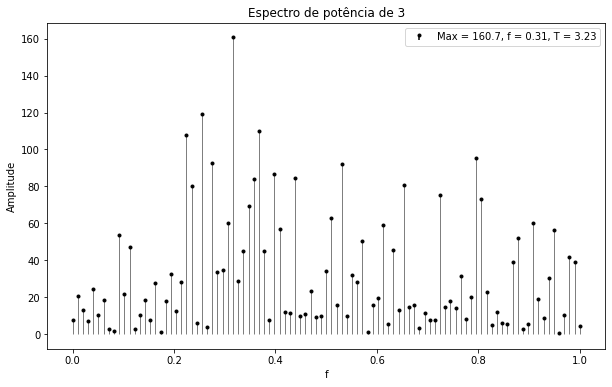

In [11]:
means, std, entropy, eveness, count = [], [], [], [], 0

for split_signal in splits_e:
    p =PowerSpec(split_signal)
    plot_power(p, str(count))
    count+=1
    means.append(split_signal.mean())
    std.append(split_signal.std())
    entropy.append(Entropy(Relative_freq(split_signal)))
    eveness.append(Evenness(Relative_freq(split_signal)))
data = {"Média":means, "Desvio": std, "Entropia": entropy, "Eveness":eveness}
print(pd.DataFrame(data))
print()
plt.legend()
plt.show()

<h2> Média e desvio do grau e coeficiente de aglomeração de grafos dos sinais, obtidos pelo método de visibilidade<h2>

Grau:
Média: 2.58 Desvio padrão: 0.11 

Coeficiente de aglomeração: 0.03


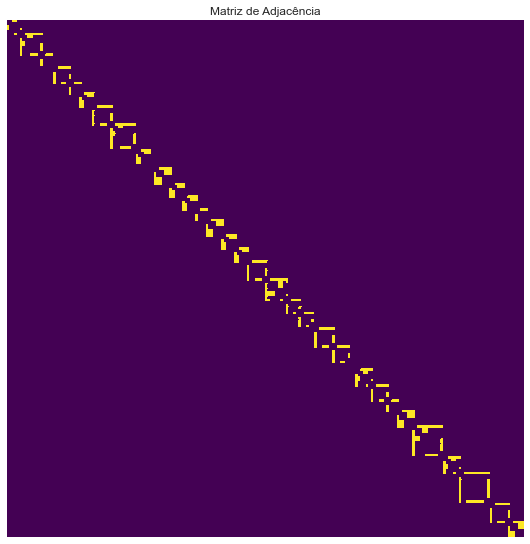

In [12]:
M_e = Visibility(automato_e)

_ = Average_Degree(automato_e, M_e)
_ = Clustering_Coefficient(M_e)

# Exercício PCA 

---
<h2> Preparo ao projeto 3:
    
1. ter distribuição circular de pontos uniformemente    distribuidos:  gerar N pontos por rand(-1,1) e testar    a distância ao centro das coordenadas, mantendo apenas    os pontos de distância menor ou igual a 1;
2.  Y = Y * 0.2 (comprime os dados verticalmente para 1/5)
3.  Rotacionar os pontos usando [cos(30) sin(30); sin(30) cos(30)]
4.  Visualizar os dados, para ver se está parecido com Figura 9, CDT-24
5.  Obter matriz de covariância K dos dados gerados
6.  Obter autovalores/autovetores de K
7.  Ordenar decrescentemente os autovelores juntamente com autovatores
8.  Obter matriz Q usando autovalores como linhas
9.  Aplicar nos dados e mostrar novo resultado.<h2>


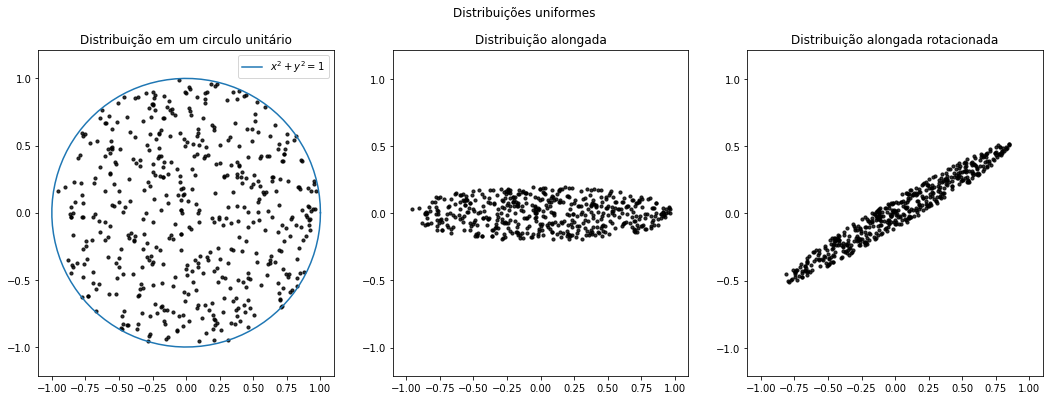

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

N = 500
circle = [[],[]]
dist_x, dist_y = [], [] 

while len(dist_x) <= N:
    # Gera uma distribuição normal entre [-1,1]
    x,y = np.random.rand(2)*2 -1
    #verifica se o ponto esta num circulo unitário de raio 1
    if x**2+y**2 <=1:
        circle[0].append(x)
        circle[1].append(y)
        dist_x.append(x)
        dist_y.append(y*0.2) 
        
#matriz de rotação         
rot = [[np.cos(np.pi/6), np.sin(np.pi/6)], [np.sin(np.pi/6), np.cos(np.pi/6)]]   
#faz a rotação
result = np.dot(rot, [dist_x,dist_y])

fig, ax = plt.subplots(1, 3, figsize=(6*3, 6), sharex=True)
fig.suptitle("Distribuições uniformes")
ax[0].set_title("Distribuição em um circulo unitário")
ax[1].set_title("Distribuição alongada")
ax[2].set_title("Distribuição alongada rotacionada")

for i in range(3):
    ax[i].axis('equal')

an = np.linspace(0, 2 * np.pi, 100)
ax[0].plot(np.cos(an), np.sin(an), label= "$x^2+y^2=1$")
ax[0].scatter(circle[0],circle[1],color = "black" , alpha = 0.8, s = 10)
ax[1].scatter(dist_x, dist_y, color = "black", alpha = 0.8, s = 10)
ax[2].scatter(result[0], result[1], color = "black", alpha = 0.8, s = 10)
# plt.savefig("images/uniform_dist.png")
ax[0].legend()
plt.show()

<h2> Matriz de covariância K<h2>

Matriz de covariância K:
 [[0.20104687 0.11715137]
 [0.11715137 0.07140269]]

       lambda_1  lambda_2
Valor  0.270114  0.002335

v1 = [ 0.86143685 -0.5078647 ]
v2 = [0.5078647  0.86143685]


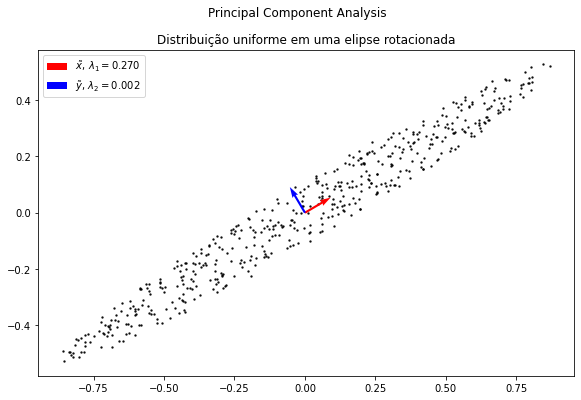

In [20]:
K = np.cov(result)
print("Matriz de covariância K:\n %s\n"%K)
eigenvalue, eigenvector = np.linalg.eig(K)

if eigenvalue[0]<eigenvalue[1]: #garante ordem decrescente para o caso N=2
    eigenvalue[::-1]
    eigenvector[::-1]
    if (len(eigenvalue)>2):
        print("Sort Error")


lambdas = {"lambda_1":eigenvalue[0],"lambda_2":eigenvalue[1]}
print(pd.DataFrame(lambdas, index = ["Valor"]))
print()
print("v1 = %s\nv2 = %s" %(eigenvector[0],eigenvector[1]))

#plot
fig, ax = plt.subplots(1, 1, figsize=(9.6, 6))
fig.suptitle("Principal Component Analysis")
ax.set_title("Distribuição uniforme em uma elipse rotacionada")
ax.axis('equal')
ax.scatter(result[0], result[1], color = "black", alpha = 0.8, s = 2)
ax.quiver(*[0,0], *eigenvector[:,0], width = 0.004, color = "red", label= "$\~x $, $\lambda_1 = %.3f$"%eigenvalue[0])
ax.quiver(*[0,0], *eigenvector[:,1], width = 0.004, color = "blue", label= "$\~y  $, $\lambda_2 = %.3f$"%eigenvalue[1])
plt.legend()
plt.show()